### This projects takes the energy information from BP statistical review

### The source link for the excel file is https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx

#### The file has sort of energy information, the one used for this project is:
##### Solar Generation - TWh that displays the solar generation in TWh from 1965 til 2018

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

print('libraries imported')

libraries imported


In [2]:
#Import the Solar energy generation data
Solar = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Solar Generation - TWh', skiprows = 2)
display(Solar)

,Terawatt-hours,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2018.1,2007-17,2018.2,Unnamed: 58,Unnamed: 59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.119800,2.895000,3.031314,3.292199,3.546251,0.077168,0.605416,0.006066,NaN,NaN
2,Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221000,0.246000,0.252276,1.186506,2.242800,0.890256,0.629306,0.003836,NaN,NaN
3,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.216162,39.426263,55.420202,78.056566,97.118182,0.244203,0.532086,0.166119,NaN,NaN
4,Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.556962,42.567263,58.703792,82.535271,102.907233,0.246827,0.535420,0.176021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,♦ Less than 0.05%.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,n/a not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,"USSR includes Georgia, Ukraine and the Baltic ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,"# Excludes Estonia, Latvia and Lithuania pri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 60 columns):
Terawatt-hours    110 non-null object
1965              90 non-null float64
1966              90 non-null float64
1967              90 non-null float64
1968              90 non-null float64
1969              90 non-null float64
1970              90 non-null float64
1971              90 non-null float64
1972              90 non-null float64
1973              90 non-null float64
1974              90 non-null float64
1975              90 non-null float64
1976              90 non-null float64
1977              90 non-null float64
1978              90 non-null float64
1979              90 non-null float64
1980              90 non-null float64
1981              90 non-null float64
1982              90 non-null float64
1983              90 non-null float64
1984              90 non-null float64
1985              99 non-null float64
1986              99 non-null float64
1987              99 

In [4]:
Solar.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Solar.shape

(119, 60)

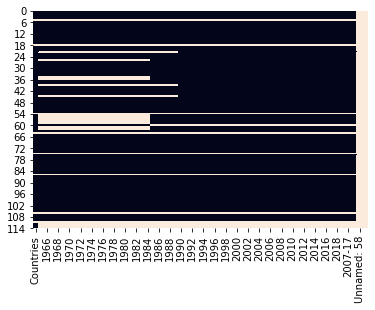

In [5]:
sns.heatmap(Solar.isnull(), cbar=False)

In [6]:
#Removing the Rows and Columns with NaN values
Solar.set_index('Countries', inplace=True)
Solar.dropna(how='all', axis = 0, inplace=True)
Solar.dropna(how='all', axis = 1, inplace=True)
Solar = Solar.iloc[:Solar.index.get_loc('Total World'),:Solar.columns.get_loc(2018)+1]
Solar

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.109300,0.254200,0.571600,0.881000,1.498800,2.119800,2.895000,3.031314,3.292199,3.546251
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027000,0.031000,0.041000,0.069000,0.106000,0.221000,0.246000,0.252276,1.186506,2.242800
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.075960,3.013036,4.738904,9.037014,16.039695,29.216162,39.426263,55.420202,78.056566,97.118182
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.212260,3.298236,5.351504,9.987014,17.644495,31.556962,42.567263,58.703792,82.535271,102.907233
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taiwan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009211,0.025587,0.070266,0.173078,0.337854,0.551709,0.875516,1.132230,1.691600,2.733000
Thailand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044400,0.058300,0.094400,0.498500,1.257500,1.933500,2.378000,3.377000,4.480862,4.719657
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.004000,0.007000,0.008882,0.080232


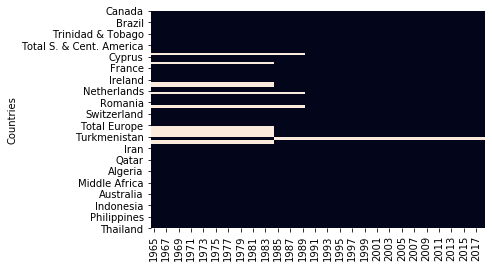

In [7]:
sns.heatmap(Solar.isnull(), cbar=False)

In [8]:
#Fill the NaN values with 0
Solar.fillna(0, inplace=True)

In [9]:
Solar.shape

(99, 54)

## Working with the countries

In [10]:
#Taking only the countries
Countries = Solar[~Solar.index.str.startswith('Total')].sort_values(['Countries'])
Countries

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.009100,0.018119,0.026723,0.028600,0.060000,0.058000,0.245000,0.504000,0.603000
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.290242,0.977648,2.044547,2.412000,3.847400,4.952000,5.958000,7.474595,8.955110,12.081099
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048914,0.088813,0.174070,0.337483,0.625974,0.785246,0.937098,1.096016,1.268971,1.578641
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000800,0.002900,0.004600,0.035300,0.037200,0.039260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020000,0.040277,0.243663,1.353764,2.010262,4.054062,7.533414,10.410948,11.524870,12.921815
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.008785,0.010036,0.010008,0.010008


In [11]:
Countries.shape

(92, 54)

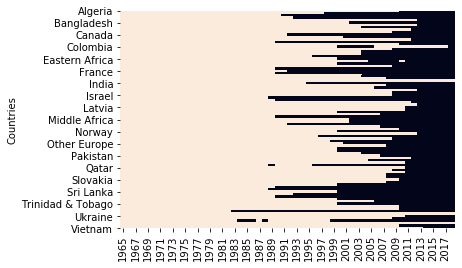

In [12]:
#Check the 0 values
sns.heatmap(Countries.isin([0]), cbar=False)

In [13]:
#Removing the rows with only zero values
Countries = Countries[(Countries.T != 0).any()]
Countries

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.009100,0.018119,0.026723,0.028600,0.060000,0.058000,0.245000,0.504000,0.603000
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.290242,0.977648,2.044547,2.412000,3.847400,4.952000,5.958000,7.474595,8.955110,12.081099
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048914,0.088813,0.174070,0.337483,0.625974,0.785246,0.937098,1.096016,1.268971,1.578641
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000800,0.002900,0.004600,0.035300,0.037200,0.039260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016900,0.018100,0.021200,0.024100,0.103800,0.300700,0.301000,0.331300,0.532373,0.946883
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020000,0.040277,0.243663,1.353764,2.010262,4.054062,7.533414,10.410948,11.524870,12.921815
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.008785,0.010036,0.010008,0.010008


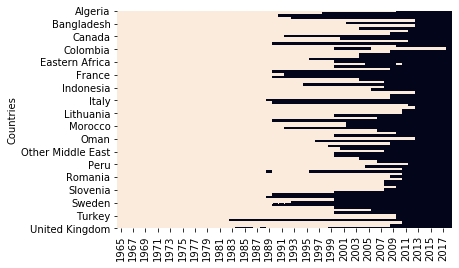

In [14]:
#Check the 0 values
sns.heatmap(Countries.isin([0]), cbar=False)

In [15]:
#Take the years from 2008 til 2018
Countries_New = Countries.iloc[:,Countries.columns.get_loc(2008):]
Countries_New

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,
Algeria,0.000000,0.000000,0.009100,0.018119,0.026723,0.028600,0.060000,0.058000,0.245000,0.504000,0.603000
Argentina,0.000144,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129
Australia,0.139200,0.290242,0.977648,2.044547,2.412000,3.847400,4.952000,5.958000,7.474595,8.955110,12.081099
Austria,0.030120,0.048914,0.088813,0.174070,0.337483,0.625974,0.785246,0.937098,1.096016,1.268971,1.578641
Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.002900,0.004600,0.035300,0.037200,0.039260
...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.000000,0.016900,0.018100,0.021200,0.024100,0.103800,0.300700,0.301000,0.331300,0.532373,0.946883
United Kingdom,0.017000,0.020000,0.040277,0.243663,1.353764,2.010262,4.054062,7.533414,10.410948,11.524870,12.921815
Venezuela,0.000000,0.000000,0.002460,0.002980,0.005220,0.005347,0.006748,0.008785,0.010036,0.010008,0.010008


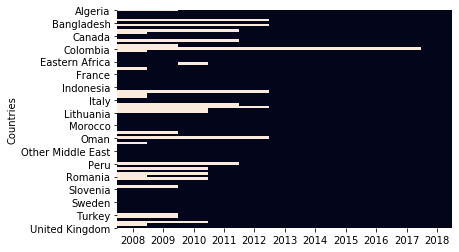

In [16]:
#Check the 0 values
sns.heatmap(Countries_New.isin([0]), cbar=False)

The chosen country is Turkey

The degree of the equation is: 1
The RMSE is 1.692346969491774 and R2 is 0.4617847698219031

The generation (original value) for 2018 is [7.89069408]
The prediction for 2018 is [[3.57411168]]
The prediction for 2019 is [[4.06982572]]
The prediction for 2020 is [[4.56553976]]


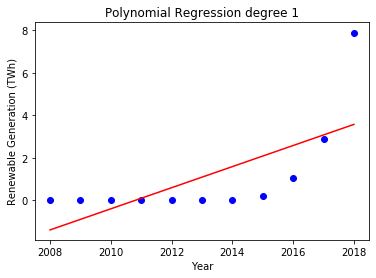

The degree of the equation is: 2
The RMSE is 0.9919655020593487 and R2 is 0.8150857822683163

The generation (original value) for 2018 is [7.89069408]
The prediction for 2018 is [[5.90288821]]
The prediction for 2019 is [[8.1063717]]
The prediction for 2020 is [[10.62035873]]


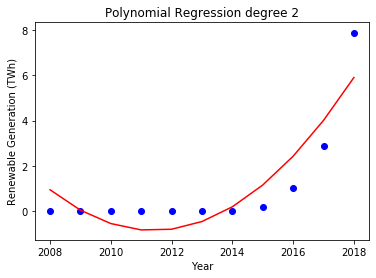

The degree of the equation is: 3
The RMSE is 0.45119925121280763 and R2 is 0.961742736035266

The generation (original value) for 2018 is [7.89069408]
The prediction for 2018 is [[7.24289858]]
The prediction for 2019 is [[12.17427444]]
The prediction for 2020 is [[18.75786185]]


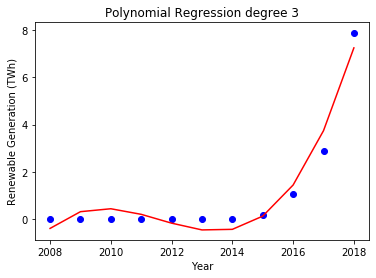

The degree of the equation is: 4
The RMSE is 0.4504036872564409 and R2 is 0.961877529111334

The generation (original value) for 2018 is [7.89069408]
The prediction for 2018 is [[7.24650121]]
The prediction for 2019 is [[12.18546152]]
The prediction for 2020 is [[18.78286794]]


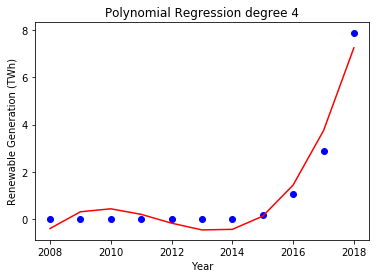

In [42]:
#Linear regression for one country
df=Countries_New.transpose()
x=df.index.values.reshape(-1,1)

#Choose here the country name to make the prediction
Country_Name = 'Turkey'


try:
    print(f'The chosen country is {Country_Name}')
    print('')
    y=df[Country_Name].values.reshape(-1,1)
    for i in range(1,5):
        print('The degree of the equation is: '+str(i))

        #Fit the Poly regression
        poly = PolynomialFeatures(degree = i)
        x_poly = poly.fit_transform(x)
        poly.fit(x_poly,y)

        lin=LinearRegression()
        lin.fit(x_poly,y)
        y_poly_pred = lin.predict(x_poly)

        rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
        r2 = r2_score(y,y_poly_pred)
        print('The RMSE is {} and R2 is {}'. format(rmse, r2))
        print('')
        print('The generation (original value) for 2018 is {}'.format(y[-1]))
        print('The prediction for 2018 is {}'.format(lin.predict(poly.fit_transform([[2018]]))))
        print('The prediction for 2019 is {}'.format(lin.predict(poly.fit_transform([[2019]]))))
        print('The prediction for 2020 is {}'.format(lin.predict(poly.fit_transform([[2020]]))))

        #Plot Poly regression
        plt.scatter(x,y,color='blue')
        plt.plot(x,lin.predict(poly.fit_transform(x)),color='red')
        plt.title('Polynomial Regression degree '+str(i))
        plt.xlabel('Year')
        plt.ylabel('Renewable Generation (TWh)')
        plt.show()

except:
    print('Country not found')

### Working with the Totals by region

In [18]:
#Taking only the totals by region
Total = Solar[Solar.index.str.startswith('Total')].sort_values(['Countries'])
Total

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Total Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.107870,0.223865,0.460530,0.553427,0.824283,1.826256,3.568277,4.911321,6.610571,9.029089
Total Asia Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.383498,6.738748,12.154399,17.583028,32.338907,62.874749,99.193726,141.755229,227.196638,314.208553
Total CIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000007,0.000240,0.001823,0.006338,0.018844,0.177377,0.411040,0.635750,0.767299,0.881300
Total Europe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.192827,23.263392,46.713482,71.869614,86.935087,98.832506,109.880176,113.950479,124.542379,139.052063
Total Middle East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044800,0.097939,0.227483,0.429934,0.766215,1.499202,2.388005,3.455738,4.409889,6.121154
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.212260,3.298236,5.351504,9.987014,17.644495,31.556962,42.567263,58.703792,82.535271,102.907233
Total S. & Cent. America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023761,0.060737,0.126640,0.335077,0.530740,1.143456,2.730733,4.965804,7.455610,12.431527


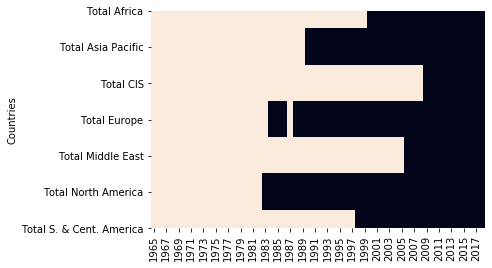

In [21]:
#Check the 0 values
sns.heatmap(Total.isin([0]), cbar=False)

In [30]:
#Take the years from 2008 til 2018
Total_New = Total.iloc[:,Countries.columns.get_loc(2008):]
Total_New

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,
Total Africa,0.084917,0.107870,0.223865,0.460530,0.553427,0.824283,1.826256,3.568277,4.911321,6.610571,9.029089
Total Asia Pacific,3.330603,4.383498,6.738748,12.154399,17.583028,32.338907,62.874749,99.193726,141.755229,227.196638,314.208553
Total CIS,0.000000,0.000007,0.000240,0.001823,0.006338,0.018844,0.177377,0.411040,0.635750,0.767299,0.881300
Total Europe,7.501099,14.192827,23.263392,46.713482,71.869614,86.935087,98.832506,109.880176,113.950479,124.542379,139.052063
Total Middle East,0.003500,0.044800,0.097939,0.227483,0.429934,0.766215,1.499202,2.388005,3.455738,4.409889,6.121154
Total North America,1.687484,2.212260,3.298236,5.351504,9.987014,17.644495,31.556962,42.567263,58.703792,82.535271,102.907233
Total S. & Cent. America,0.014537,0.023761,0.060737,0.126640,0.335077,0.530740,1.143456,2.730733,4.965804,7.455610,12.431527


The degree of the equation is: 1
The RMSE is 45.61372016092437 and R2 is 0.7892005747891592

The generation (original value) for 2018 is [314.20855289]
The prediction for 2018 is [[223.34446751]]
The prediction for 2019 is [[251.25412321]]
The prediction for 2020 is [[279.16377892]]


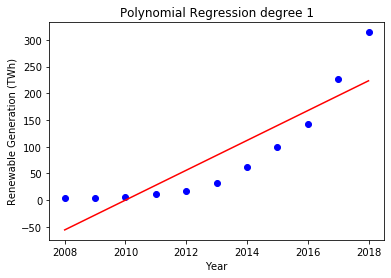

The degree of the equation is: 2
The RMSE is 11.488966629776463 and R2 is 0.9866266450791368

The generation (original value) for 2018 is [314.20855289]
The prediction for 2018 is [[298.3178303]]
The prediction for 2019 is [[381.20795209]]
The prediction for 2020 is [[474.09452226]]


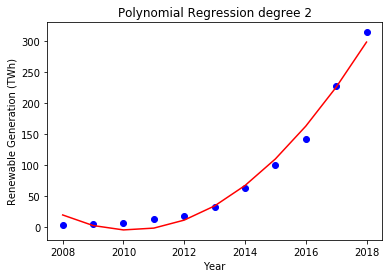

The degree of the equation is: 3
The RMSE is 3.413095707582723 and R2 is 0.998819746307295

The generation (original value) for 2018 is [314.20855289]
The prediction for 2018 is [[314.947577]]
The prediction for 2019 is [[431.71229792]]
The prediction for 2020 is [[575.13575029]]


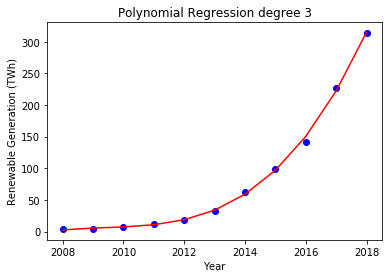

The degree of the equation is: 4
The RMSE is 3.4114243102916686 and R2 is 0.998820901967718

The generation (original value) for 2018 is [314.20855289]
The prediction for 2018 is [[314.99607241]]
The prediction for 2019 is [[431.84147036]]
The prediction for 2020 is [[575.41515601]]


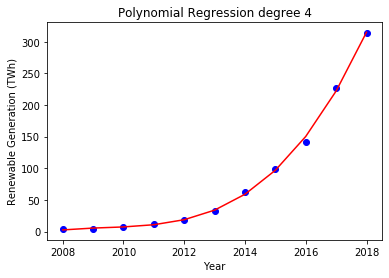

In [34]:
#Linear regression for one country
df1=Total_New.transpose()
x=df1.index.values.reshape(-1,1)
y=df1['Total Asia Pacific'].values.reshape(-1,1)

for i in range(1,5):
    print('The degree of the equation is: '+str(i))
        
    #Fit the Poly regression
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    poly.fit(x_poly,y)
    
    lin=LinearRegression()
    lin.fit(x_poly,y)
    y_poly_pred = lin.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('The RMSE is {} and R2 is {}'. format(rmse, r2))
    print('')
    print('The generation (original value) for 2018 is {}'.format(y[-1]))
    print('The prediction for 2018 is {}'.format(lin.predict(poly.fit_transform([[2018]]))))
    print('The prediction for 2019 is {}'.format(lin.predict(poly.fit_transform([[2019]]))))
    print('The prediction for 2020 is {}'.format(lin.predict(poly.fit_transform([[2020]]))))
    
    #Plot Poly regression
    plt.scatter(x,y,color='blue')
    plt.plot(x,lin.predict(poly.fit_transform(x)),color='red')
    plt.title('Polynomial Regression degree '+str(i))
    plt.xlabel('Year')
    plt.ylabel('Renewable Generation (TWh)')
    plt.show()
